# Volatility

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time
import math

In [3]:
btc = pd.read_csv('bpi.csv')
def str_to_time(elem):
    day = datetime.datetime.strptime(elem, '%Y-%m-%d')
    return day

btc['Date'] = btc['Date'].apply(str_to_time)
btc = btc.set_index('Date')

In [4]:
df = pd.read_csv('df_final.csv')
df['id'] = df['id'].astype(str)
df['timestamp'] = df['timestamp'].astype(int)
df['author'] = df['author'].astype(str)
df['score'] = df['score'].astype(int)
df['comments'] = df['comments'].astype(int)
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)
df['Time'] = pd.to_datetime(df['Time'])
df['Day'] = pd.to_datetime(df['Day'])

# Making the new dataset

What should be included?
- Price of Bitcoin
- 30 Day Rolling Volatility
- Number of comments that day
- Change to the previous day
- Number of threads that day
- Change to the previous day

In [63]:
agg_coms = df.groupby('Day').sum()['comments']
ch_agg_coms = [math.nan]
ch_agg_coms_pct = [math.nan]
for i in range(1,len(agg_coms)):
    ch_agg_coms.append(agg_coms.iloc[i]-agg_coms.iloc[i-1])
    ch_agg_coms_pct.append((agg_coms.iloc[i]/agg_coms.iloc[i-1])-1)

agg_threads = df.groupby('Day').count()['id']
ch_agg_threads = [math.nan]
ch_agg_threads_pct = [math.nan]
for i in range(1, len(agg_threads)):
    ch_agg_threads.append(agg_threads.iloc[i]-agg_threads.iloc[i-1])
    ch_agg_threads_pct.append((agg_threads.iloc[i]/agg_threads.iloc[i-1])-1)
    
ch_btc = [math.nan]
ch_btc_pct = [math.nan]
for i in range(1, len(btc['BPI'])):
    ch_btc.append(btc['BPI'].iloc[i]-btc['BPI'].iloc[i-1])
    ch_btc_pct.append((btc['BPI'].iloc[i]/btc['BPI'].iloc[i-1])-1)

In [64]:
vola = pd.DataFrame(ch_btc_pct).rolling(30).std()*np.sqrt(30)
vola.index = btc.index

In [69]:
ch_vola = [math.nan]
for i in range(1, len(vola)):
    ch_vola.append(vola.iloc[i]-vola.iloc[i-1])

In [71]:
ds = pd.DataFrame()
ds['BTC'] = btc['BPI']
ds['BTC_ch'] = ch_btc
ds['BTC_ch_p'] = ch_btc_pct
ds['BTC_vola'] = vola
ds['BTC_vola_ch'] = ch_vola

ds['Comments'] = agg_coms
ds['Comments_ch'] = ch_agg_coms
ds['Comments_ch_p'] = ch_agg_coms_pct

ds['Threads'] = agg_threads
ds['Threads_ch'] = ch_agg_threads
ds['Threads_ch_p'] = ch_agg_threads_pct

In [72]:
ds = ds[ds.index<'2020-01-01']

In [73]:
ds.corr()

,BTC,BTC_ch,BTC_ch_p,BTC_vola,Comments,Comments_ch,Comments_ch_p,Threads,Threads_ch,Threads_ch_p
BTC,1.000000,0.035846,0.010680,0.530053,0.474627,-0.011333,-0.013820,0.472211,-0.007384,-0.015159
BTC_ch,0.035846,1.000000,0.823555,0.008040,0.025301,-0.073672,-0.054386,0.062442,0.059358,0.029633
BTC_ch_p,0.010680,0.823555,1.000000,0.017709,0.029846,-0.056640,-0.050896,0.057963,0.044736,0.029862
BTC_vola,0.530053,0.008040,0.017709,1.000000,0.502403,-0.022472,-0.019919,0.472748,-0.020641,-0.027128
Comments,0.474627,0.025301,0.029846,0.502403,1.000000,0.243500,0.187701,0.968141,0.215249,0.155355
Comments_ch,-0.011333,-0.073672,-0.056640,-0.022472,0.243500,1.000000,0.665728,0.173562,0.810389,0.473058
Comments_ch_p,-0.013820,-0.054386,-0.050896,-0.019919,0.187701,0.665728,1.000000,0.105284,0.423426,0.626692
Threads,0.472211,0.062442,0.057963,0.472748,0.968141,0.173562,0.105284,1.000000,0.235580,0.167229
Threads_ch,-0.007384,0.059358,0.044736,-0.020641,0.215249,0.810389,0.423426,0.235580,1.000000,0.603423
Threads_ch_p,-0.015159,0.029633,0.029862,-0.027128,0.155355,0.473058,0.626692,0.167229,0.603423,1.000000


In [74]:
import seaborn as sns

<AxesSubplot:>

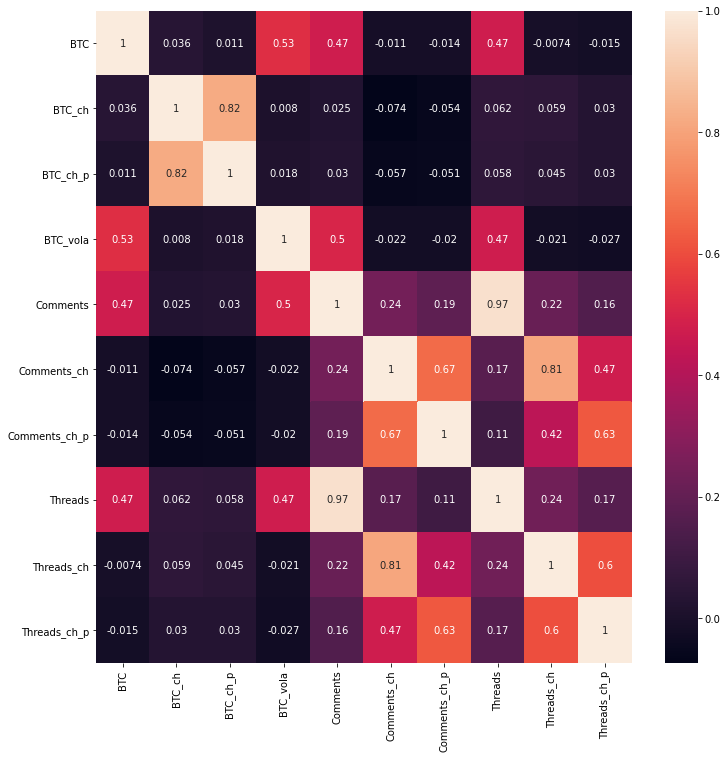

In [75]:
plt.figure(figsize=(12,12))
sns.heatmap(ds.corr(), annot=True)